In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import random
%matplotlib inline

In [71]:
# select a single genus at random, cluster the annotators to this genus
# start with most frequent genus.
# goal is to see if annotations for this genus are either consistent among the genus, or consistent among individual annotators.

In [72]:
frame = pd.read_csv('for_data_science_newline_fixed.csv', usecols = ["IN FILE","CLIP LENGTH","OFFSET","DURATION","MAX FREQ","MIN FREQ","SAMPLE RATE","LAST MOD BY"])

In [73]:
frame

,IN FILE,CLIP LENGTH,OFFSET,DURATION,MAX FREQ,MIN FREQ,SAMPLE RATE,LAST MOD BY
0,Aburria-aburri-257423.wav,24.6335,2.3614,3.3205,24000,0,44100,alarce
1,Aburria-aburri-257423.wav,24.6335,6.7320,2.0103,24000,0,44100,alarce
2,Aburria-aburri-257423.wav,24.6335,19.2438,3.4505,24000,0,44100,alarce
3,Aburria-aburri-387212.wav,84.4800,0.6011,3.0800,24000,0,44100,alarce
4,Aburria-aburri-387212.wav,84.4800,77.6811,3.1400,24000,0,44100,alarce
...,...,...,...,...,...,...,...,...
31360,Zonotrichia-capensis-232609.wav,98.8560,63.2772,1.8301,24000,0,32000,JacobGlennAyers
31361,Zonotrichia-capensis-232609.wav,98.8560,34.1554,2.4702,24000,0,32000,JacobGlennAyers
31362,Zonotrichia-capensis-377483.wav,18.2596,0.5762,3.2199,24000,0,44100,JacobGlennAyers
31363,Zonotrichia-capensis-377483.wav,18.2596,6.8160,2.1500,24000,0,44100,JacobGlennAyers


In [74]:
CLIP_LENGTHS = frame.groupby("IN FILE")[["CLIP LENGTH"]].max()
SUM_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].sum()

MEDIAN_DURATIONS = frame.groupby("IN FILE")[["DURATION"]].median()
MEDIAN_DURATIONS = MEDIAN_DURATIONS.rename(columns={'DURATION': 'MEDIAN DURATION'})

NUMBER_ANN = frame.groupby("IN FILE")[["OFFSET"]].count()
NUMBER_ANN = NUMBER_ANN.rename(columns = {'OFFSET':'OFFSET COUNT'})

MED_DIST_BW_ANNS = frame.copy(True)

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.sort_values(['IN FILE','OFFSET'])
MED_DIST_BW_ANNS['ENDSET'] = MED_DIST_BW_ANNS['OFFSET'] + MED_DIST_BW_ANNS['DURATION']

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS[['IN FILE','CLIP LENGTH','OFFSET','ENDSET','LAST MOD BY']]

MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS.loc[MED_DIST_BW_ANNS['IN FILE'].shift(-1) == MED_DIST_BW_ANNS['IN FILE'], 'ENDSET']
MED_DIST_BW_ANNS['PREV END'] = MED_DIST_BW_ANNS['PREV END'].shift()

MED_DIST_BW_ANNS = MED_DIST_BW_ANNS.fillna(0)
MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] = MED_DIST_BW_ANNS['OFFSET'] - MED_DIST_BW_ANNS['PREV END']

MED_DIST_BW_ANNS['OVERLAP'] = MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'].loc[MED_DIST_BW_ANNS['DIST BETWEEN ANN PREV'] < 0]

OVER_LAP = MED_DIST_BW_ANNS.groupby('IN FILE')[['OVERLAP']].count()
OVER_LAP = OVER_LAP.rename(columns = {'OVERLAP':'OVERLAP COUNT'})

DIST_BETWEEN_ANN_PREV = MED_DIST_BW_ANNS.groupby('IN FILE')[['DIST BETWEEN ANN PREV']].median()
DIST_BETWEEN_ANN_PREV = DIST_BETWEEN_ANN_PREV.rename(columns={'DIST BETWEEN ANN PREV': 'MEDIAN DIST B/W ANNS'})

LAST_MOD_BY = MED_DIST_BW_ANNS.groupby('IN FILE')[['LAST MOD BY']].max()

WHITE_SPACE = frame.copy(True)
DUR = WHITE_SPACE.groupby(['IN FILE'])[['DURATION']].sum()
DUR = DUR.rename(columns = {'DURATION':'SUM DURATION'})
LEN = WHITE_SPACE.groupby(['IN FILE'])[['CLIP LENGTH']].max()
WHITE_SPACE = LEN.join(DUR)
WHITE_SPACE['WHITE SPACE'] = WHITE_SPACE['CLIP LENGTH'] - WHITE_SPACE['SUM DURATION']

WHITE_SPACE = WHITE_SPACE.join(OVER_LAP)
WHITE_SPACE = WHITE_SPACE.join(DIST_BETWEEN_ANN_PREV)
WHITE_SPACE = WHITE_SPACE.join(MEDIAN_DURATIONS)
WHITE_SPACE = WHITE_SPACE.join(NUMBER_ANN)
WHITE_SPACE = WHITE_SPACE.join(LAST_MOD_BY)
WHITE_SPACE.reset_index(inplace=True)
WHITE_SPACE
# MED_DIST_BW_ANNS

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce
...,...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4,alarce
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21,alarce
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17,JacobGlennAyers
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3,JacobGlennAyers


In [75]:
def species(row):
    species = row['IN FILE']
    spec = species.split('-')
    # print(spec)
    # print(spec[:-1])
    spec_to = '-'.join(spec[:-2])
    return spec_to

WHITE_SPACE['Genus'] = WHITE_SPACE.apply (lambda row: species(row), axis=1)

# diff_genus = frame[frame['Genus']].value_counts().index_values()#.to_list()
# print(diff_genus[:3])

# WHITE_SPACE = WHITE_SPACE[(WHITE_SPACE['Genus'] ==  'Himantopus-mexicanus') | (WHITE_SPACE['Genus'] ==  'Ramphocaenus-sticturus')] # or 
len(WHITE_SPACE['Genus'].unique())
WHITE_SPACE

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
0,Aburria-aburri-257423.wav,24.63350,8.7813,15.85220,0,2.36140,3.32050,3,alarce,Aburria
1,Aburria-aburri-387212.wav,84.48000,9.4200,75.06000,0,26.76000,3.14000,3,alarce,Aburria
2,Accipiter-bicolor-451839.wav,5.66857,4.6442,1.02437,3,0.00000,0.21550,20,alarce,Accipiter
3,Accipiter-collaris-260335.wav,45.37470,7.6708,37.70390,0,5.19555,1.03010,8,alarce,Accipiter
4,Accipiter-collaris-260336.wav,26.93220,4.8604,22.07180,1,1.03060,0.57010,8,alarce,Accipiter
...,...,...,...,...,...,...,...,...,...,...
2438,Zimmerius-gracilipes-258668.wav,12.19920,3.2975,8.90170,0,1.48075,0.81325,4,alarce,Zimmerius
2439,Zimmerius-gracilipes-258669.wav,27.55920,10.8399,16.71930,0,0.68000,0.52000,21,alarce,Zimmerius
2440,Zonotrichia-capensis-232609.wav,98.85600,31.5518,67.30420,0,3.73360,1.70010,17,JacobGlennAyers,Zonotrichia
2441,Zonotrichia-capensis-377483.wav,18.25960,7.7298,10.52980,0,3.01990,2.35990,3,JacobGlennAyers,Zonotrichia


In [76]:
annotator = WHITE_SPACE['LAST MOD BY'].unique()
sampled_annotator = random.sample(list(annotator),1)
sampled_annotator

['sunqiaochen']

In [77]:
annotator_df = WHITE_SPACE[WHITE_SPACE['LAST MOD BY'].isin(sampled_annotator)]
annotator_df

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
534,Coeligena-coeligena-39005.wav,30.0480,19.8183,10.2297,0,0.25000,0.50000,39,sunqiaochen,Coeligena
641,Crypturellus-variegatus-494092.wav,15.4122,1.7902,13.6220,0,5.01150,1.79020,1,sunqiaochen,Crypturellus
759,Emberizoides-herbicola-427347.wav,14.9040,7.9168,6.9872,0,1.17950,1.29945,6,sunqiaochen,Emberizoides
763,Empidonomus-varius-502104.wav,32.7120,20.2380,12.4740,0,1.22175,3.46520,6,sunqiaochen,Empidonomus
881,Gymnomystax-mexicanus-327291.wav,52.4880,27.7755,24.7125,0,1.79990,1.96990,13,sunqiaochen,Gymnomystax
...,...,...,...,...,...,...,...,...,...,...
2371,Vireo-flavoviridis-252539.wav,25.1037,0.3199,24.7838,0,24.71780,0.31990,1,sunqiaochen,Vireo
2394,Xenops-minutus-528418.wav,17.7110,1.3601,16.3509,0,7.99745,0.68005,2,sunqiaochen,Xenops
2398,Xenops-tenuirostris-147053.wav,26.1747,1.6903,24.4844,0,24.17840,1.69030,1,sunqiaochen,Xenops
2399,Xenops-tenuirostris-39438.wav,8.1600,1.5937,6.5663,0,5.24710,1.59370,1,sunqiaochen,Xenops


In [78]:
genus = annotator_df['Genus'].value_counts()
sampled_genus = genus.index[:5]#random.sample(list(genus),1)
sampled_genus
# genus

Index(['Thamnophilus', 'Tangara', 'Myrmotherula', 'Synallaxis', 'Tinamus'], dtype='object')

In [79]:
annotator_genus_df = annotator_df[annotator_df['Genus'].isin(sampled_genus)]
annotator_genus_df

,IN FILE,CLIP LENGTH,SUM DURATION,WHITE SPACE,OVERLAP COUNT,MEDIAN DIST B/W ANNS,MEDIAN DURATION,OFFSET COUNT,LAST MOD BY,Genus
1298,Myrmotherula-axillaris-187780.wav,14.6286,7.6592,6.9694,0,0.65825,0.97490,8,sunqiaochen,Myrmotherula
1301,Myrmotherula-brachyura-394449.wav,13.8449,6.9373,6.9076,0,0.69480,1.03455,6,sunqiaochen,Myrmotherula
1303,Myrmotherula-brachyura-88177.wav,96.7314,14.4167,82.3147,0,9.88350,3.00000,5,sunqiaochen,Myrmotherula
1305,Myrmotherula-grisea-82803.wav,15.0465,6.2686,8.7779,0,3.54250,1.90960,3,sunqiaochen,Myrmotherula
1308,Myrmotherula-iheringi-474914.wav,60.0480,44.7753,15.2727,0,2.18325,7.25640,6,sunqiaochen,Myrmotherula
...,...,...,...,...,...,...,...,...,...,...
2227,Tinamus-osgoodi-474901.wav,93.3878,6.3498,87.0380,0,2.22700,3.17490,2,sunqiaochen,Tinamus
2228,Tinamus-tao-217695.wav,47.2033,11.9474,35.2559,0,7.59060,2.28020,5,sunqiaochen,Tinamus
2229,Tinamus-tao-231261.wav,34.0376,7.7694,26.2682,0,7.62280,2.74980,3,sunqiaochen,Tinamus
2230,Tinamus-tao-236216.wav,223.5820,90.0200,133.5620,0,3.17000,2.10010,41,sunqiaochen,Tinamus


In [80]:
knn_data = annotator_genus_df[['LAST MOD BY','Genus','SUM DURATION','MEDIAN DURATION','OVERLAP COUNT','OFFSET COUNT','CLIP LENGTH','WHITE SPACE']].copy(True)
knn_data

,LAST MOD BY,Genus,SUM DURATION,MEDIAN DURATION,OVERLAP COUNT,OFFSET COUNT,CLIP LENGTH,WHITE SPACE
1298,sunqiaochen,Myrmotherula,7.6592,0.97490,0,8,14.6286,6.9694
1301,sunqiaochen,Myrmotherula,6.9373,1.03455,0,6,13.8449,6.9076
1303,sunqiaochen,Myrmotherula,14.4167,3.00000,0,5,96.7314,82.3147
1305,sunqiaochen,Myrmotherula,6.2686,1.90960,0,3,15.0465,8.7779
1308,sunqiaochen,Myrmotherula,44.7753,7.25640,0,6,60.0480,15.2727
...,...,...,...,...,...,...,...,...
2227,sunqiaochen,Tinamus,6.3498,3.17490,0,2,93.3878,87.0380
2228,sunqiaochen,Tinamus,11.9474,2.28020,0,5,47.2033,35.2559
2229,sunqiaochen,Tinamus,7.7694,2.74980,0,3,34.0376,26.2682
2230,sunqiaochen,Tinamus,90.0200,2.10010,0,41,223.5820,133.5620


In [81]:
from sklearn.cluster import KMeans

In [82]:
from sklearn.preprocessing import MinMaxScaler

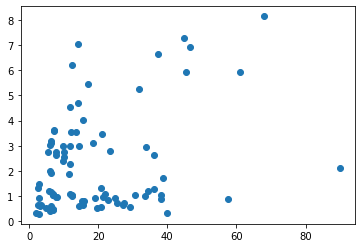

In [83]:
plt.scatter(knn_data['SUM DURATION'],knn_data['MEDIAN DURATION'])
plt.show()

In [84]:
scaler = MinMaxScaler()

scaler.fit(knn_data[['MEDIAN DURATION']])
knn_data['MEDIAN DURATION'] = scaler.transform(knn_data[['MEDIAN DURATION']])

scaler.fit(knn_data[['SUM DURATION']])
knn_data['SUM DURATION'] = scaler.transform(knn_data[['SUM DURATION']])

scaler.fit(knn_data[['OVERLAP COUNT']])
knn_data['OVERLAP COUNT'] = scaler.transform(knn_data[['OVERLAP COUNT']])

scaler.fit(knn_data[['OFFSET COUNT']])
knn_data['OFFSET COUNT'] = scaler.transform(knn_data[['OFFSET COUNT']])

scaler.fit(knn_data[['CLIP LENGTH']])
knn_data['CLIP LENGTH'] = scaler.transform(knn_data[['CLIP LENGTH']])

scaler.fit(knn_data[['WHITE SPACE']])
knn_data['WHITE SPACE'] = scaler.transform(knn_data[['WHITE SPACE']])

In [85]:
knn_data

,LAST MOD BY,Genus,SUM DURATION,MEDIAN DURATION,OVERLAP COUNT,OFFSET COUNT,CLIP LENGTH,WHITE SPACE
1298,sunqiaochen,Myrmotherula,0.065058,0.087135,0.0,0.052174,0.042192,0.034394
1301,sunqiaochen,Myrmotherula,0.056863,0.094735,0.0,0.034783,0.038600,0.033922
1303,sunqiaochen,Myrmotherula,0.141768,0.345151,0.0,0.026087,0.418538,0.609103
1305,sunqiaochen,Myrmotherula,0.049272,0.206224,0.0,0.008696,0.044108,0.048188
1308,sunqiaochen,Myrmotherula,0.486392,0.887453,0.0,0.034783,0.250387,0.097728
...,...,...,...,...,...,...,...,...
2227,sunqiaochen,Tinamus,0.050194,0.367434,0.0,0.000000,0.403211,0.645130
2228,sunqiaochen,Tinamus,0.113737,0.253442,0.0,0.026087,0.191509,0.250154
2229,sunqiaochen,Tinamus,0.066309,0.313273,0.0,0.008696,0.131160,0.181598
2230,sunqiaochen,Tinamus,1.000000,0.230495,0.0,0.339130,1.000000,1.000000


In [86]:
clust = len(knn_data['Genus'].unique())
clust

5

In [87]:
km2 = KMeans(n_clusters = clust)
y_predicted = km2.fit_predict(knn_data[['SUM DURATION','MEDIAN DURATION','OVERLAP COUNT','OFFSET COUNT','CLIP LENGTH','WHITE SPACE']])
y_predicted

array([4, 4, 2, 4, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 2, 4, 1, 1, 4, 1, 1, 4,
       1, 1, 4, 1, 4, 4, 1, 4, 1, 1, 4, 4, 4, 4, 3, 4, 4, 1, 1, 1, 4, 4,
       4, 4, 2, 4, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 1, 4, 4,
       4, 4, 4, 4, 0, 0, 0, 4, 4, 4, 4, 4, 0, 0, 2, 4, 2, 4, 4, 2, 2])

In [88]:
knn_data['cluster'] = y_predicted
knn_data

,LAST MOD BY,Genus,SUM DURATION,MEDIAN DURATION,OVERLAP COUNT,OFFSET COUNT,CLIP LENGTH,WHITE SPACE,cluster
1298,sunqiaochen,Myrmotherula,0.065058,0.087135,0.0,0.052174,0.042192,0.034394,4
1301,sunqiaochen,Myrmotherula,0.056863,0.094735,0.0,0.034783,0.038600,0.033922,4
1303,sunqiaochen,Myrmotherula,0.141768,0.345151,0.0,0.026087,0.418538,0.609103,2
1305,sunqiaochen,Myrmotherula,0.049272,0.206224,0.0,0.008696,0.044108,0.048188,4
1308,sunqiaochen,Myrmotherula,0.486392,0.887453,0.0,0.034783,0.250387,0.097728,0
...,...,...,...,...,...,...,...,...,...
2227,sunqiaochen,Tinamus,0.050194,0.367434,0.0,0.000000,0.403211,0.645130,2
2228,sunqiaochen,Tinamus,0.113737,0.253442,0.0,0.026087,0.191509,0.250154,4
2229,sunqiaochen,Tinamus,0.066309,0.313273,0.0,0.008696,0.131160,0.181598,4
2230,sunqiaochen,Tinamus,1.000000,0.230495,0.0,0.339130,1.000000,1.000000,2


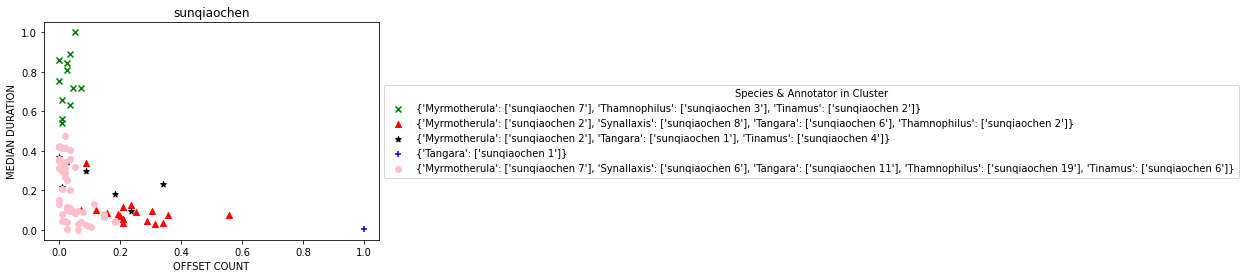

In [89]:
df1 = knn_data[knn_data.cluster == 0]
df2 = knn_data[knn_data.cluster == 1]
df3 = knn_data[knn_data.cluster == 2]
df4 = knn_data[knn_data.cluster == 3]
df5 = knn_data[knn_data.cluster == 4]

plot1 = plt.scatter(df1['OFFSET COUNT'],df1['MEDIAN DURATION'],color = 'green',marker = 'x')
plot2 = plt.scatter(df2['OFFSET COUNT'],df2['MEDIAN DURATION'],color = 'red',marker = '^')
plot3 = plt.scatter(df3['OFFSET COUNT'],df3['MEDIAN DURATION'],color = 'black',marker = '*')
plot4 = plt.scatter(df4['OFFSET COUNT'],df4['MEDIAN DURATION'],color = 'blue',marker = '+')
plot5 = plt.scatter(df5['OFFSET COUNT'],df5['MEDIAN DURATION'],color = 'pink',marker = 'o')

# lab1 = dict((df1['LAST MOD BY']+' '+df1['Genus']).value_counts())
# lab2 = dict((df2['LAST MOD BY']+' '+df2['Genus']).value_counts())
# lab3 = dict((df3['LAST MOD BY']+' '+df3['Genus']).value_counts())
# lab4 = dict((df4['LAST MOD BY']+' '+df4['Genus']).value_counts())
# lab5 = dict((df5['LAST MOD BY']+' '+df5['Genus']).value_counts())

lab1 = df1[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab1['LAST MOD BY'] = (lab1['LAST MOD BY']+' '+lab1['COUNT'].astype(str))
lab1 = lab1.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab2 = df2[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab2['LAST MOD BY'] = (lab2['LAST MOD BY']+' '+lab2['COUNT'].astype(str))
lab2 = lab2.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab3 = df3[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab3['LAST MOD BY'] = (lab3['LAST MOD BY']+' '+lab3['COUNT'].astype(str))
lab3 = lab3.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab4 = df4[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab4['LAST MOD BY'] = (lab4['LAST MOD BY']+' '+lab4['COUNT'].astype(str))
lab4 = lab4.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

lab5 = df5[['LAST MOD BY','Genus']].groupby(['Genus','LAST MOD BY'])[['LAST MOD BY']].count().rename(columns = {"LAST MOD BY":'COUNT'}).reset_index()
lab5['LAST MOD BY'] = (lab5['LAST MOD BY']+' '+lab5['COUNT'].astype(str))
lab5 = lab5.drop(columns = ['COUNT']).groupby('Genus')['LAST MOD BY'].apply(list).to_dict()

plt.xlabel('OFFSET COUNT')
plt.ylabel('MEDIAN DURATION')
plt.legend([plot1, plot2, plot3, plot4,plot5], [lab1, lab2, lab3, lab4,lab5],loc='center left', bbox_to_anchor=(1, 0.5),title = 'Species & Annotator in Cluster')
plt.title(' & '.join(knn_data['LAST MOD BY'].unique()))
plt.show()

In [90]:
# import plotly.express as px 

# fig = px.scatter(df1, x='OFFSET COUNT', y='MEDIAN DURATION',text = 'LAST MOD BY')
# fig2 = px.scatter(df2, x='OFFSET COUNT', y='MEDIAN DURATION',text = 'LAST MOD BY')
# fig.show()

In [91]:
# fig2.show()

In [92]:
# what would be similar across audio clips amongst two annotators? if they annotated the same species
# NEXT: PCA TO KNN, able to plot in 3d, then TSNE. condense to complex or not complex. what determines this. apply on IQR